# ИУ5-62Б Никитина К. В. РК №1

<a id='0'></a>
# Оглавление

1. [Задание](#1)<br>
2. [Описание датасета](#2)<br>
3. [Импорт библиотек](#3)<br>
4. [Загрузка и первичный анализ данных](#4)<br>
5. [Диаграмма рассеяния для двух стобцов](#5)<br>
6. [Обработка пропусков в данных](#6)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

>Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

>Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

>Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

Датасет `U.S. Education Datasets: Unification Project` создан для образовательной аналитики. Он содержит подробные атрибуты штатов и динамику оценок обучающихся (в США в школе).

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [29]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

In [30]:
data = pd.read_csv("states_all.csv")
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [31]:
data.shape

(1715, 25)

In [32]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [33]:
# Количество пустых значений
total_count = data.shape[0]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    temp_perc = round((temp_null_count / total_count) * 100.0, 2)
    print('Колонка {} – {}, {}%'.format(col, temp_null_count, temp_perc))    

Колонка PRIMARY_KEY – 0, 0.0%
Колонка STATE – 0, 0.0%
Колонка YEAR – 0, 0.0%
Колонка ENROLL – 491, 28.63%
Колонка TOTAL_REVENUE – 440, 25.66%
Колонка FEDERAL_REVENUE – 440, 25.66%
Колонка STATE_REVENUE – 440, 25.66%
Колонка LOCAL_REVENUE – 440, 25.66%
Колонка TOTAL_EXPENDITURE – 440, 25.66%
Колонка INSTRUCTION_EXPENDITURE – 440, 25.66%
Колонка SUPPORT_SERVICES_EXPENDITURE – 440, 25.66%
Колонка OTHER_EXPENDITURE – 491, 28.63%
Колонка CAPITAL_OUTLAY_EXPENDITURE – 440, 25.66%
Колонка GRADES_PK_G – 173, 10.09%
Колонка GRADES_KG_G – 83, 4.84%
Колонка GRADES_4_G – 83, 4.84%
Колонка GRADES_8_G – 83, 4.84%
Колонка GRADES_12_G – 83, 4.84%
Колонка GRADES_1_8_G – 695, 40.52%
Колонка GRADES_9_12_G – 644, 37.55%
Колонка GRADES_ALL_G – 83, 4.84%
Колонка AVG_MATH_4_SCORE – 1150, 67.06%
Колонка AVG_MATH_8_SCORE – 1113, 64.9%
Колонка AVG_READING_4_SCORE – 1065, 62.1%
Колонка AVG_READING_8_SCORE – 1153, 67.23%


In [34]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [35]:
# df = data.drop('LoanedFrom', axis=1)
# df = data.drop('Unnamed', axis=1)

<a id="5"></a>
# Диаграмма рассеяния для двух стобцов ([к оглавлению](#0))

<AxesSubplot:xlabel='YEAR', ylabel='AVG_MATH_8_SCORE'>

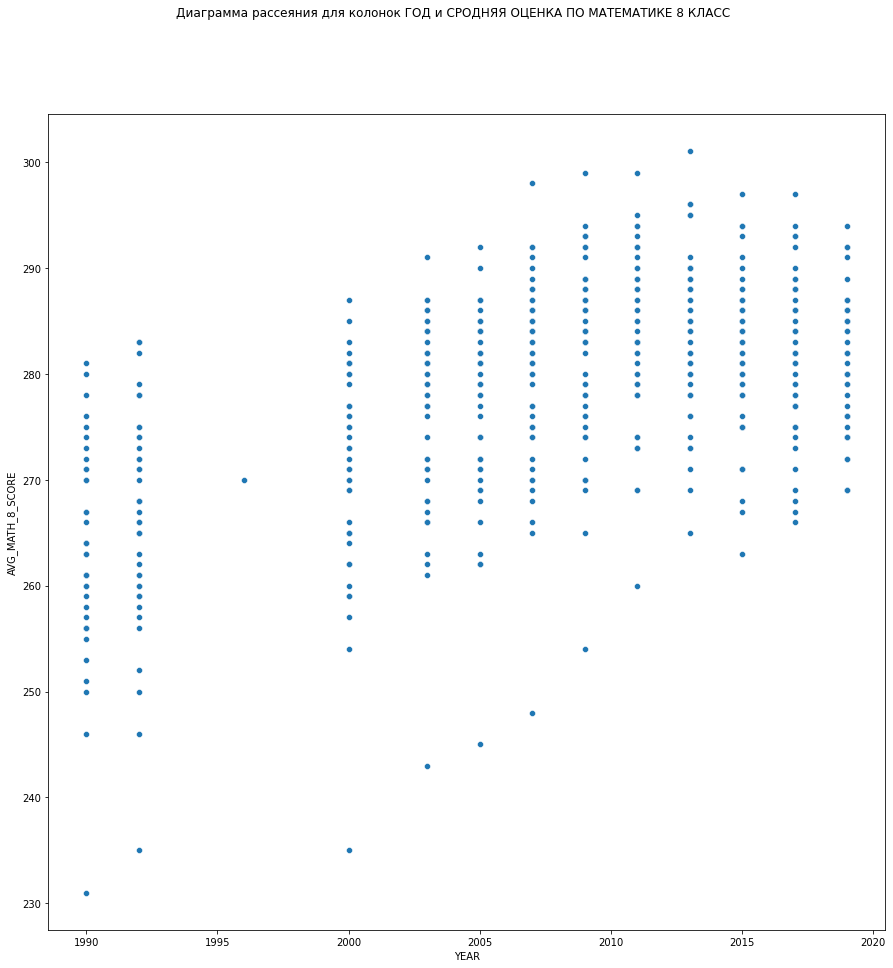

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))
fig.suptitle("Диаграмма рассеяния для колонок ГОД и СРОДНЯЯ ОЦЕНКА ПО МАТЕМАТИКЕ 8 КЛАСС")
sns.scatterplot(ax=ax, x='YEAR', y='AVG_MATH_8_SCORE', data=data)

<a id="6"></a>
# Обработка пропусков в данных ([к оглавлению](#0))

### Количественный признак

In [37]:
# Импьютация столбца JerseyNumber с помощью медианы

temp_col = SimpleImputer(strategy='median').fit_transform(data[['AVG_MATH_8_SCORE']])
data[['AVG_MATH_8_SCORE']] = temp_col

### Категориальный признак
У нас отсутствуют пропуски в категориальных признаках, поэтому сделаем еще одну аимпьютацию количественного признака

In [38]:
 temp_col = SimpleImputer(strategy='mean').fit_transform(data[['AVG_READING_8_SCORE']])
data[['AVG_READING_8_SCORE ']] = temp_col  

<AxesSubplot:>

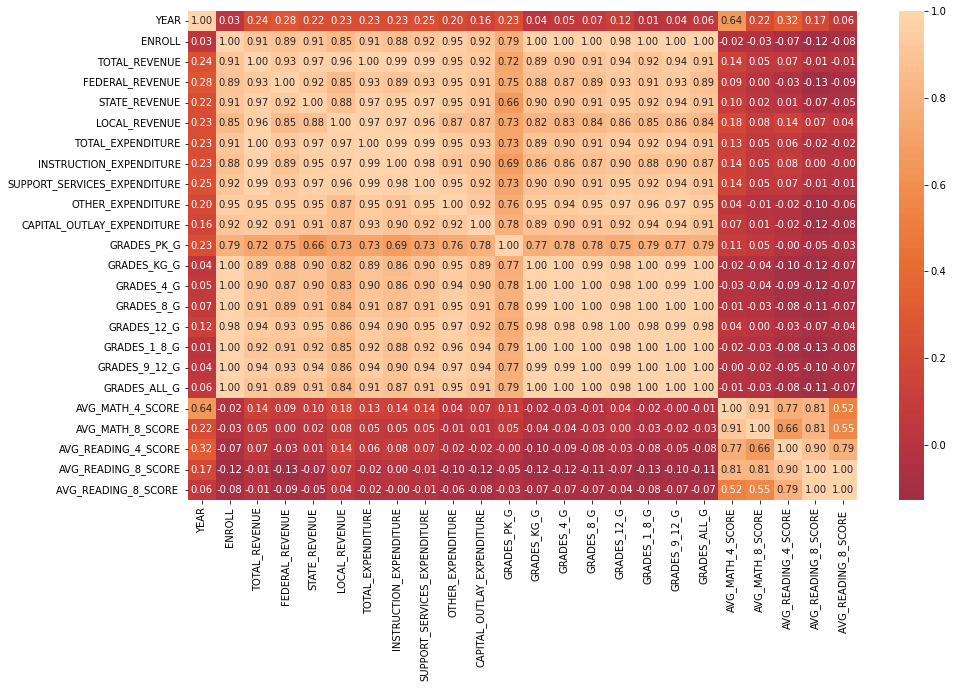

In [39]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center = -1)

### Ответы

Для количественных признаков использовалась замена медианой.

Для дальнейшего построения моделей я бы использовала признаки, имеющие максимальную взаимную корреляцию, а некоррелирующие - нет.